# **1.3: Student Attendance**
# By student no: F216727

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import sqlite3 
import matplotlib.pyplot as plt

## Functions

### Read the dataframe (Create a table and plot a bar chart)

In [2]:
# Using inner joins for df sessions with the student attendance df for COA111 and COA122
def get_stuAtt(id):
    
    sqlstrcoa111="""
    SELECT stucoa111.*, coa111sessions.week
    FROM coa111sessions INNER JOIN stucoa111
    ON stucoa111.session_no = coa111sessions.session_no;
    """
    conn = sqlite3.connect('CWDatabase.db')
    stuAttcoa111 = pd.read_sql(sqlstrcoa111,
                                con=conn,
                                index_col=["session_no"])
    stuAttcoa111 = stuAttcoa111.groupby("week").mean(1) * 100 
    stuAttcoa111 = stuAttcoa111.round() 

    attcoa111 = stuAttcoa111.loc[:, [id]] 

    sqlstrcoa122="""
    SELECT stucoa122.*, coa122sessions.week
    FROM coa122sessions INNER JOIN stucoa122
    ON stucoa122.session_no = coa122sessions.session_no;
    """
    conn = sqlite3.connect('CWDatabase.db')
    stuAttcoa122 = pd.read_sql(sqlstrcoa122,
                                con=conn,
                                index_col=["session_no"])
    stuAttcoa122 = stuAttcoa122.groupby("week").mean(1) * 100 
    stuAttcoa122 = stuAttcoa122.round() 
   
    attcoa122 = stuAttcoa122.loc[:, [id]]
    
    # using concatenate to link both modules in the same table 
    attmodules = pd.concat([attcoa111, attcoa122], axis = 1, keys = ['COA111', 'COA122']) 
   
    # plotting the bar chart
    attmodules.plot.bar() 
    attmodules = attmodules.replace({np.nan: 'No Attendance'})
    plt.title("Student Attendance Record COA111/122 of Student ID:") 
    plt.legend() 
    plt.ylabel("Attendance (%)") 
    plt.xlabel("Week_number") 
    plt.show() 

    return attmodules 

## Main code (the student attendance) input function:

In [3]:
def stu_att_main(stu_id): 
    # using try and except if there is no information for particular student ID
    try:
        stuatt = get_stuAtt(str(stu_id))
        display(stuatt)
    except:
        print("This student ID does not exist. Please insert again!")

### Testing (student attendance)

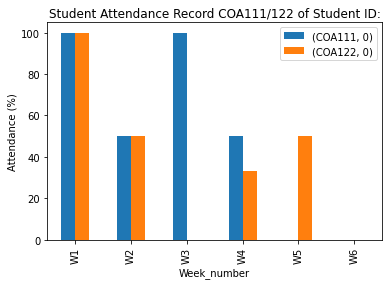

,COA111,COA122
,0,0
week,,
W1,100.0,100.0
W2,50.0,50.0
W3,100.0,0.0
W4,50.0,33.0
W5,0.0,50.0
W6,No Attendance,0.0


In [4]:
stu_att_main(0)
# please insert the student numbers inside the brackets to test 